# Metoda celor mai apropiați k-vecini


### Importuri necesare

In [53]:
import numpy as np
import matplotlib.pyplot as plt

### Calea catre date

In [54]:
dataPath = "data/"

### Incarcare date train

In [55]:
train_images = np.loadtxt(dataPath + "train_images.txt")
train_labels = np.loadtxt(dataPath + "train_labels.txt",'int8')

/var/folders/kz/c9pg7sbj61z3qqncn5j2m3mh0000gn/T/ipykernel_82245/3426902312.py:2: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then convert it.  (On all NumPy versions.)
  (Deprecated NumPy 1.23)
  train_labels = np.loadtxt(dataPath + "train_labels.txt",'int8')


In [56]:
print(train_images.shape)
print(train_images.ndim)
print(type(train_images[0,0]))
print(train_images.size)
print(train_images.nbytes)

(1000, 784)
2
<class 'numpy.float64'>
784000
6272000


### Plotare date train

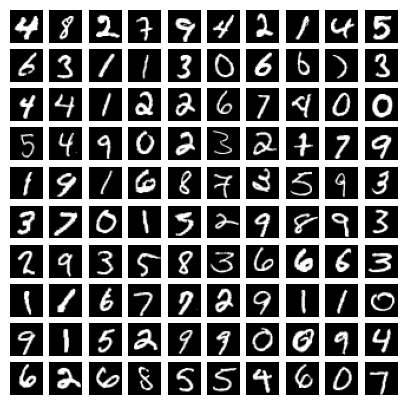

[[4 8 2 7 9 4 2 1 4 5]
 [6 3 1 1 3 0 6 6 7 3]
 [4 4 1 2 2 6 7 4 0 0]
 [5 4 9 0 2 3 2 7 7 9]
 [1 9 1 6 8 7 3 5 9 3]
 [3 7 0 1 3 2 9 8 9 3]
 [2 9 3 5 8 3 6 6 6 3]
 [1 1 6 7 7 2 9 1 1 0]
 [9 1 5 2 9 9 0 0 9 4]
 [6 2 6 8 5 5 4 6 0 7]]


In [57]:
nbImages = 10
plt.figure(figsize=(5,5))
for i in range(nbImages**2):
    plt.subplot(nbImages,nbImages,i+1)
    plt.axis('off')
    plt.imshow(np.reshape(train_images[i,:],(28,28)),cmap = "gray")
plt.show()
labels_nbImages = train_labels[:nbImages**2]
print(np.reshape(labels_nbImages,(nbImages,nbImages)))

### Incarcare date test

In [58]:
test_images = np.loadtxt(dataPath + "test_images.txt")
test_labels = np.loadtxt(dataPath + "test_labels.txt",'int8')

/var/folders/kz/c9pg7sbj61z3qqncn5j2m3mh0000gn/T/ipykernel_82245/4177868563.py:2: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then convert it.  (On all NumPy versions.)
  (Deprecated NumPy 1.23)
  test_labels = np.loadtxt(dataPath + "test_labels.txt",'int8')


### Plotare date test

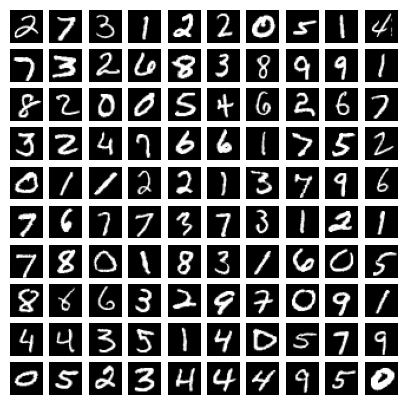

[[2 7 3 1 2 2 0 5 1 4]
 [7 3 2 6 8 3 8 9 9 1]
 [8 2 0 0 5 4 6 2 6 7]
 [3 2 4 7 6 6 1 7 5 2]
 [0 1 1 2 2 1 3 7 9 6]
 [7 6 7 7 3 7 3 1 2 1]
 [7 8 0 1 8 3 1 6 0 5]
 [8 6 6 3 2 9 7 0 9 1]
 [4 4 3 5 1 4 0 5 7 9]
 [0 5 2 3 4 4 4 9 5 0]]


In [59]:
nbImages = 10
plt.figure(figsize=(5,5))
for i in range(nbImages**2):
    plt.subplot(nbImages,nbImages,i+1)
    plt.axis('off')
    plt.imshow(np.reshape(test_images[i,:],(28,28)),cmap = "gray")
plt.show()
labels_nbImages = test_labels[:nbImages**2]
print(np.reshape(labels_nbImages,(nbImages,nbImages)))

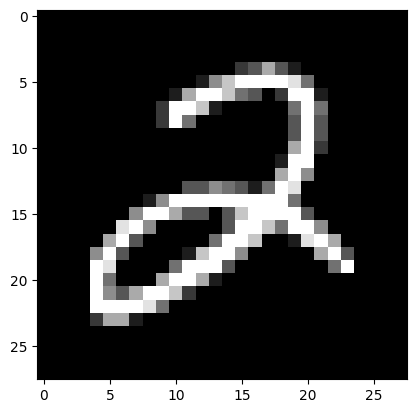

[0]


In [60]:
img=test_images[0, :]
plt.imshow(np.reshape(img, (28, 28)), cmap='gray')
plt.show()
distances=np.sqrt(((img-img)**2).sum())
indices=distances.argsort()
print(indices)


## Rezolvarea exercitiului 1

1. Considerați primul exemplu din mulțimea de testare (este o imagine cu cifra 2). Determinați și afișați (plotând într-o figură) cei mai apropiați k-vecini ai acestui exemplu de testare din mulțimea de antrenare folosind distanța euclidiană (l2). Folosiți valorile k = 1, 3, 5, 7. Care va fi eticheta asignată exemplului de testare pentru fiecare din cele 4 cazuri?

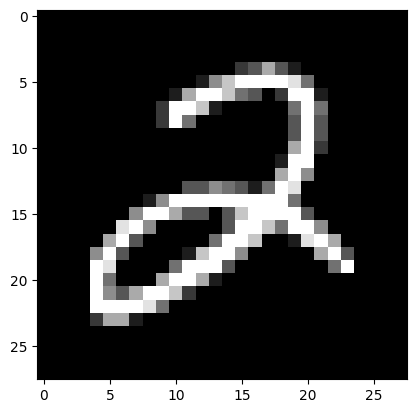

Pentru 1 vecini eticheta este: 2
Pentru 3 vecini eticheta este: 2
Pentru 5 vecini eticheta este: 2
Pentru 7 vecini eticheta este: 2


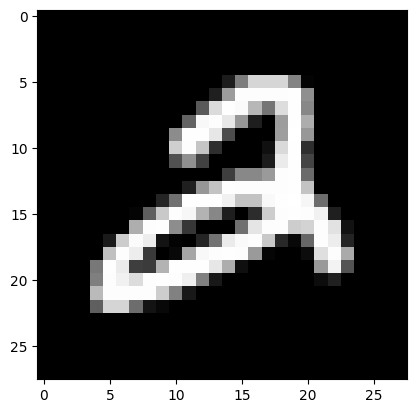

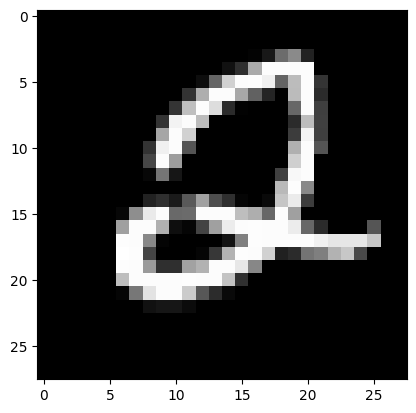

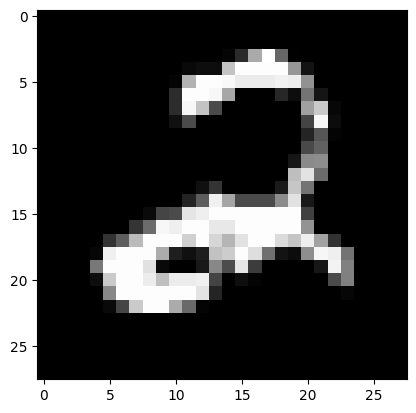

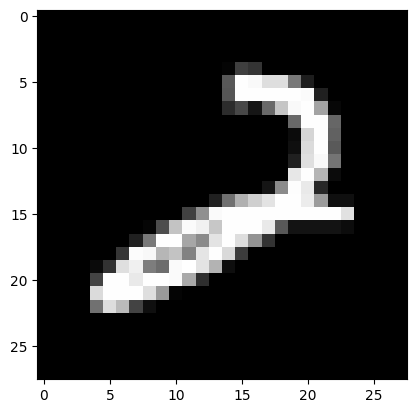

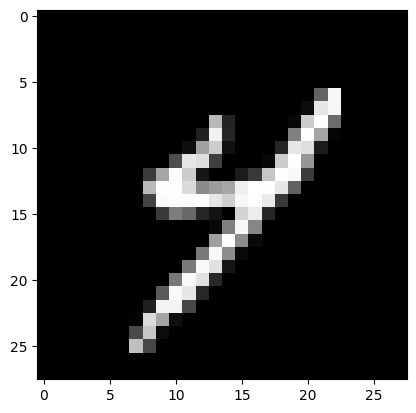

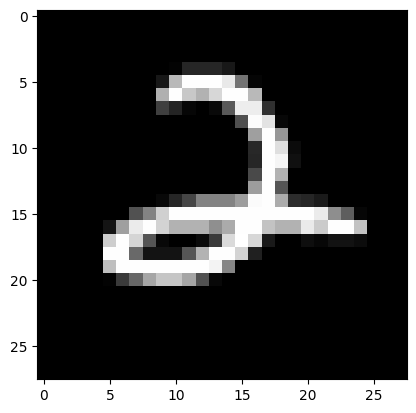

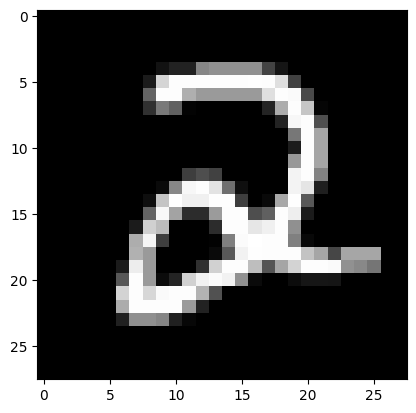

In [61]:
img=test_images[0, :]
plt.imshow(np.reshape(img, (28, 28)), cmap='gray')
plt.show()
distances=np.sqrt(((train_images-img)**2).sum(axis=1))
indices=distances.argsort()
k=[1, 3, 5, 7]
for i in k:
    labels_knn=train_labels[indices[:i]]
    # print(labels_knn)
    count=np.bincount(labels_knn)
    # print(count)
    label=count.argmax()
    print(f'Pentru {i} vecini eticheta este: {label}')


knn=indices[:7]
for i in range(7):
    plt.imshow(np.reshape(train_images[knn[i], :], (28, 28)), cmap='gray')
    plt.show()


2. Definiți metoda classify_image(train_images,train_labes, test_image, num_neighbors = 3, metric = 'l2') care clasifică imaginea test_image folosind exemple etichetate din mulțimea de antrenare (exemplele – train_images, etichetele – train_labels) cu metoda celor mai apropiați vecini, numărul vecinilor este stabilit de parametru num_neighbors, iar distanța poate fi l1 (distanța Manhattan) sau l2 (distanța euclidiană), în funcție de parametrul metric.
Observație:
- pentru vectorii 𝒙 = 𝑥!,𝑥!,... 𝑥! și 𝒚 = 𝑦!,𝑦!,... 𝑦! distanțele 𝑙! și 𝑙! se definesc astfel:
𝑙! 𝒙,𝒚 =   !!! 𝑥! −𝑦! ,𝑙! 𝒙,𝒚 = !!! 𝑥! −𝑦! !
- în variabilele train_images și test_image valorile unui exemplu sunt stocate pe linie. (train_images.shape = (num_samples, num_features), test_image.shape = (1, num_features) )

In [62]:
def classify_image(train_images,train_labels, test_image, num_neighbors = 3, metric = 'l2'):
    if metric == 'l2':
        distances = np.sqrt(((train_images - test_image)**2).sum(axis=1))
    elif metric == 'l1':
        distances = (abs(train_images - test_image)).sum(axis=1)
    else:
        print('Eroare')
    indices=distances.argsort()
    labels_knn=train_labels[indices[:num_neighbors]]
    count=np.bincount(labels_knn)
    return count.argmax()

3. Calculați acuratețea metodei celor mai apropiați vecini pe mulțimea de testare având ca distanță l2 și numărul de vecini 3. Salvați predicțiile în fișierul predictii_3nn_l2_mnist.txt.

Observatie:
- Acuratețea pe mulțimea de testare este de 89.8%.

In [63]:
predicted_labels=np.zeros(len(test_labels))
for i in range(0, len(test_labels)):
    predicted_labels[i] = classify_image(train_images, train_labels, test_images[i])
print(predicted_labels)

[2. 7. 3. 1. 2. 1. 0. 5. 1. 4. 7. 3. 2. 6. 8. 3. 8. 9. 9. 1. 8. 2. 0. 0.
 5. 4. 6. 2. 6. 7. 3. 2. 4. 7. 6. 6. 1. 7. 5. 1. 0. 1. 1. 2. 2. 1. 3. 7.
 9. 6. 7. 6. 7. 7. 5. 7. 3. 1. 2. 1. 7. 8. 0. 1. 8. 3. 1. 6. 0. 5. 8. 6.
 6. 3. 2. 9. 7. 0. 9. 1. 4. 4. 3. 3. 1. 4. 0. 5. 7. 9. 0. 5. 2. 3. 4. 4.
 4. 9. 5. 0. 0. 6. 8. 4. 6. 0. 7. 5. 8. 0. 7. 9. 3. 0. 5. 7. 5. 3. 5. 7.
 3. 9. 9. 4. 1. 9. 3. 0. 6. 1. 0. 9. 1. 6. 6. 3. 7. 0. 2. 8. 7. 0. 4. 2.
 1. 3. 6. 5. 5. 3. 4. 3. 0. 0. 3. 6. 3. 2. 0. 1. 6. 4. 3. 2. 5. 3. 8. 4.
 1. 8. 5. 3. 7. 4. 2. 8. 0. 0. 0. 3. 1. 6. 6. 2. 5. 2. 9. 2. 7. 3. 5. 8.
 7. 0. 0. 3. 7. 8. 6. 7. 8. 7. 0. 5. 3. 2. 8. 2. 4. 7. 8. 4. 4. 4. 5. 2.
 7. 6. 3. 9. 6. 5. 6. 0. 1. 9. 6. 0. 2. 5. 9. 2. 8. 9. 1. 9. 6. 2. 6. 9.
 4. 4. 5. 2. 4. 5. 3. 8. 3. 8. 8. 4. 1. 0. 4. 8. 2. 9. 3. 4. 9. 5. 4. 0.
 1. 7. 7. 4. 5. 0. 1. 3. 7. 5. 6. 9. 2. 1. 2. 8. 9. 6. 8. 7. 6. 4. 0. 5.
 3. 3. 5. 6. 6. 5. 3. 2. 5. 3. 6. 1. 1. 7. 0. 8. 1. 3. 2. 1. 0. 0. 8. 0.
 0. 1. 1. 6. 4. 3. 4. 2. 7. 0. 8. 8. 4. 1. 7. 2. 4.

In [64]:
def accuracy_score(predicted_labels, test_labels):
    cnt=0
    for i in range(len(predicted_labels)):
        if (predicted_labels[i] == test_labels[i]):
            cnt+=1
    return (cnt * 100)/len(predicted_labels)

In [65]:
print(accuracy_score(predicted_labels, test_labels))

89.8


4. Definiți metoda confusion_matrix(y_true, y_pred) care calculează matricea de 
confuzie. Calculați matricea de confuzie folosind predicțiile din 
predictii_3nn_l2_mnist.txt. 

Observație: 
- Pentru matricea de confuzie C, fiecare element cij reprezintă numărul 
exemplelor din clasa i care au fost clasificate ca fiind în clasa j.

In [66]:
def confusion_matrix(y_pred, y_true):
    C = np.zeros((10, 10), 'int8')
    for i in range (len(y_true)):
        C[y_true[i], int(y_pred[i])] += 1
    return C 

In [67]:
print(confusion_matrix(predicted_labels, test_labels))

[[51  0  0  0  0  1  1  0  0  0]
 [ 0 52  0  0  0  0  0  0  0  0]
 [ 1  6 47  1  0  0  1  2  0  0]
 [ 0  0  0 51  0  1  0  0  0  1]
 [ 0  0  0  0 44  0  0  0  0  2]
 [ 2  1  1  6  0 40  1  0  0  1]
 [ 0  0  0  0  0  1 47  0  0  0]
 [ 1  2  0  0  1  0  0 46  0  0]
 [ 1  0  2  2  1  1  1  1 36  1]
 [ 0  0  1  1  3  1  0  1  0 35]]


5.  Perechea  de  cifre  (5,  3)  cea  mai  des  confundată,  având  șase  misclasificări.  Afișați 
exemplele de cifra 5 misclasificate precum și cei trei vecini. Mai jos este afișat primul 
din cele șase astfel de cazuri. 

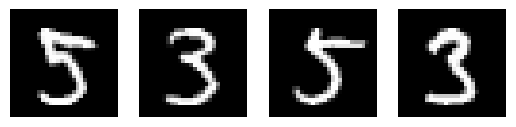

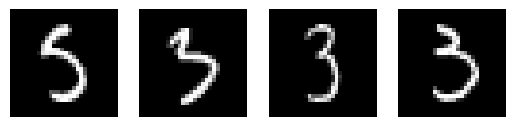

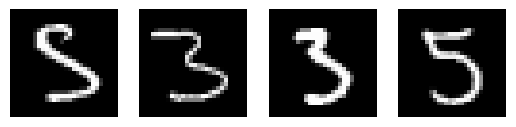

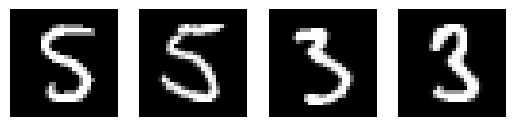

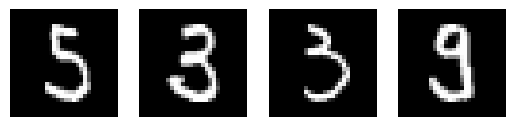

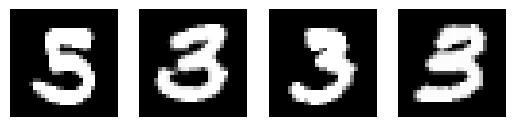

In [68]:
for i in range(len(test_labels)):
    if (test_labels[i] == 5) and (predicted_labels[i] == 3):
        cnt = 1
        img = test_images[i, :]
        plt.subplot(1, 4, cnt)    
        plt.axis('off')
        plt.imshow(np.reshape(img, (28, 28)), cmap='gray')

        distances2=np.sqrt(((train_images-img)**2).sum(axis=1))
        indices2 = distances2.argsort()
        labels_knn2 = indices2[:3]

        for j in range(3):
            cnt+=1
            plt.subplot(1, 4, cnt)
            plt.axis('off')
            plt.imshow(np.reshape(train_images[labels_knn2[j]], (28, 28)), cmap='gray')

        plt.show()
        

6.

In [78]:
k = [1, 3, 5, 7, 9]
accuracy_score_l1 = np.zeros(len(k))
accuracy_score_l2 = np.zeros(len(k))

predicted_labels_l1 = np.zeros(len(test_labels))
predicted_labels_l2 = np.zeros(len(test_labels))

for i in range(len(k)):
    for j in range(len(test_labels)):
        predicted_labels_l1[j] = classify_image(train_images, train_labels, test_images[j], k[i], 'l1')
        predicted_labels_l2[j] = classify_image(train_images, train_labels, test_images[j], k[i], 'l2')
    
    accuracy_score_l1[i] = accuracy_score(predicted_labels_l1, test_labels)
    accuracy_score_l2[i] = accuracy_score(predicted_labels_l2, test_labels)

print(accuracy_score_l1)
print(accuracy_score_l2)

[88.  88.4 86.8 86.4 86.4]
[88.4 89.8 89.6 88.  88. ]


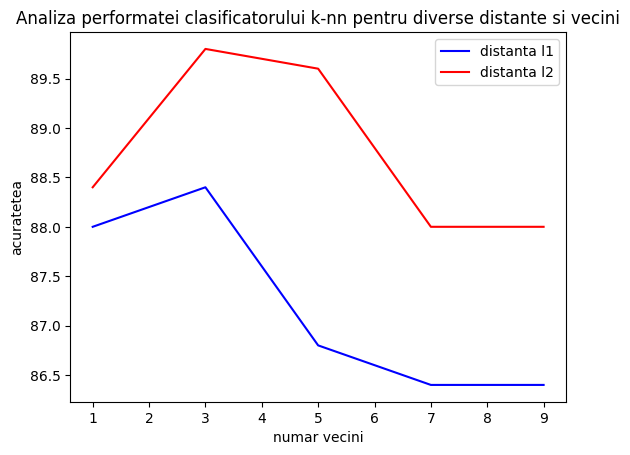

In [79]:
plt.plot(k, accuracy_score_l1, 'blue')
plt.plot(k, accuracy_score_l2, 'red')
plt.xlabel('numar vecini')
plt.ylabel('acuratetea')
plt.legend(('distanta l1', 'distanta l2'))
plt.title('Analiza performatei clasificatorului k-nn pentru diverse distante si vecini')
plt.show()